In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
%matplotlib widget
import matplotlib.pyplot as plt
import optuna as op
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as ss, LabelEncoder as labe
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, classification_report, log_loss, roc_curve
from IPython.display import clear_output, display
from sklearn.linear_model import LogisticRegression

Najpierw wykonałem trenowanie w tf na pliku cukrzycy z zadań. Dokładnośc nie była najgorsza, ale i loss duży. Skorzystałem z optuny do optymalizacji parametrów.
Wyświetlam również rozłożenie PC1-PC2 na 2 klasy na wykresie.

Epoch 1/200


/SI/si/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6715 - loss: 0.7046 - val_accuracy: 0.7143 - val_loss: 0.6932
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6635 - loss: 0.7417 - val_accuracy: 0.7208 - val_loss: 0.6866
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6509 - loss: 0.7478 - val_accuracy: 0.7208 - val_loss: 0.6806
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6701 - loss: 0.6895 - val_accuracy: 0.7143 - val_loss: 0.6746
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6504 - loss: 0.7445 - val_accuracy: 0.7208 - val_loss: 0.6690
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6661 - loss: 0.7169 - val_accuracy: 0.7208 - val_loss: 0.6640
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6723 - loss: 0.6898 - val_accuracy: 0.7208 - val_loss: 0.6587
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6806 - loss: 0.6714 - val_accuracy: 0.7208 - val_loss: 0.

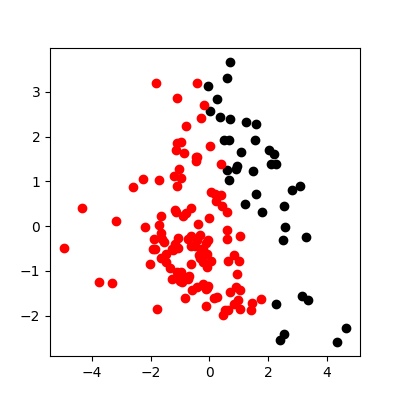

In [111]:
data = pd.read_csv("diabetes.csv")
data.dropna(inplace=True)
X = data.to_numpy()[:,0:8]
y = data.to_numpy()[:,8]

X = ss().fit_transform(X)

X = PCA(n_components=2, random_state=86).fit_transform(X)

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state=86)

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X.shape[1],))
    ]
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, validation_data=[X_test, y_test])

y_pred = model.predict(X_test)

temp3=X_test[y_pred[:,0]>=0.5]
temp4=X_test[y_pred[:,0]<0.5]

accuracy = accuracy_score(y_test, y_pred.round())

loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss: {loss}\nAccuracy: {accuracy}')
fig = plt.figure(figsize=(4,4))

fig.add_subplot(1,1,1)
plt.scatter(temp3[:,0], temp3[:,1],  color='black')
plt.scatter(temp4[:,0], temp4[:,1],  color='red')

W poniższej komórce wczytałem dane z kaggle na temat grzybów, dwie klasy, jakie staram się uzyskać to jadalne i niejadalne.
Również wyświetlam na wykresie. Warto również dodać, że pred w przypadku tf zwraca mi tak na prawdę prawdopodobieństwo przydzielenia do jednej z klas i muszę skorzystać z wykorzystywania prawdopodobieństwa do określenia klasy (poniżej 0.5 do klasy jednej i od 0.5 w górę do klasy drugiej). Parametery były pierwotnie wykorzystane takie jak powyżej, następnie zwiększałem i zmniejszałem liczbę epok oraz zmieniałem rozmiar zbioru treningowego, ale nie miało to znacznego wpływu na wyniki.

Uzyskane tu wyniki były gorsze niż w powyższym przykładzie, dokładność spadła o 0.1, a loss wzrósł o 0.1
Spory wpływ na powyższe i poniższe wyniki miało na pewno wykorzystanie PCA do tylko 2 cech.

Dodam również, że próbowałem stworzyć trójwymiarowy wykres z trzech cech PCA, ale z jakiegoś powodu w tym kodzie zawsze wartość osi Z wynosiła 0 dla wszystkich punktów, mimo wskazania trzech istniejących kolumn do scatter. Nawet gdy stworzyłem własne proste listy dla scatter, gdzie wartości osi Z były wielkimi liczbami, bo powyświetleniu pokazywane były jako 0. 

Zakomentowałem PCA i dokładność była podobna, a loss miał mniej więcej tą samą wartość co dokładność (0.63) zamiast minimalnie wyższej.

Epoch 1/200


/SI/si/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4443 - loss: 0.7595 - val_accuracy: 0.6214 - val_loss: 0.6592
Epoch 2/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6203 - loss: 0.6588 - val_accuracy: 0.6210 - val_loss: 0.6583
Epoch 3/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6244 - loss: 0.6571 - val_accuracy: 0.6212 - val_loss: 0.6583
Epoch 4/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6278 - loss: 0.6556 - val_accuracy: 0.6207 - val_loss: 0.6582
Epoch 5/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6248 - loss: 0.6576 - val_accuracy: 0.6205 - val_loss: 0.6583
Epoch 6/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6264 - loss: 0.6571 - val_accuracy: 0.6211 - val_loss: 0.6583
Epoch 7/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6219 - loss: 0.6578 - val_accuracy: 0.6204 - val_loss: 0.6583
Epoch 8/200
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6261 - loss: 0.6567 - val_

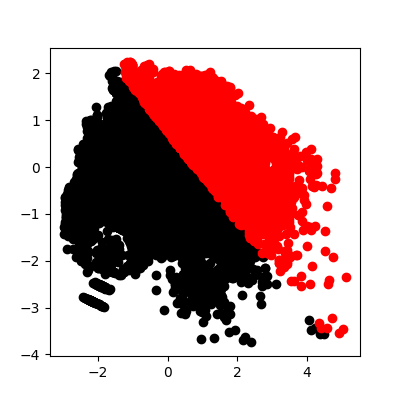

In [ ]:
data = pd.read_csv("mushroom_cleaned.csv")
data.dropna(inplace=True)
X = data.to_numpy()[:,0:8]
y = data.to_numpy()[:,8]

X = ss().fit_transform(X)

X = PCA(n_components=2, random_state=86).fit_transform(X)

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state=86)

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X.shape[1],))
    ]
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, validation_data=[X_test, y_test])

y_pred = model.predict(X_test)

temp3=X_test[y_pred[:,0]>=0.5]
temp4=X_test[y_pred[:,0]<0.5]

accuracy = accuracy_score(y_test, y_pred.round())

loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss: {loss}\nAccuracy: {accuracy}')

fig = plt.figure(figsize=(4,4))

fig.add_subplot(1,1,1)
plt.scatter(temp3[:,0], temp3[:,1],  color='black')
plt.scatter(temp4[:,0], temp4[:,1],  color='red')

Poniżej wykonuję Regresję Logistyczną również na danych z grzybów, ale wykorzystując funkcję z bilbioteki skicit-learn. Uśredniony wynik dokładności mam gorszy niż w przypadku tf. Paramtetry były optymalizowane poniższą optuną. Mam tutaj też porównanie classification_report z predict i predict proba, nie widać ani jednej różnicy. Co do optuny, uwarzam, że w przypadku grzybów istotna jest precyzja, czyli procent poprawnych przewidywań pozytywnych do wszystkich przewidywań pozytywnych, ponieważ bardziej wolelibyśmy upewnić się, że tylko dobre grzyby są klasyfikowane pozytywnie, niż mieć jak najwięcej grzybów klasyfikowanych jako jadalne. Musimy ograniczać niepoprawnie klasyfikowane pozytywnie grzyby. Co innego w przypadku Cukrzycy, gdzie najlepiej diagnozować jak najwięcej osób tak na wszelki wypadek, tam liczyłaby się dokładność, czyli stosunek wszystkich pozytywnych przewidywań do wszystkich przewidywań. 

predict:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.64      0.59      4878
         1.0       0.66      0.57      0.61      5929

    accuracy                           0.60     10807
   macro avg       0.60      0.61      0.60     10807
weighted avg       0.61      0.60      0.60     10807


predict_proba:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.64      0.59      4878
         1.0       0.66      0.57      0.61      5929

    accuracy                           0.60     10807
   macro avg       0.60      0.61      0.60     10807
weighted avg       0.61      0.60      0.60     10807

ROC AUC Score:
0.668140112418159

Log Loss:
0.6772176335851271


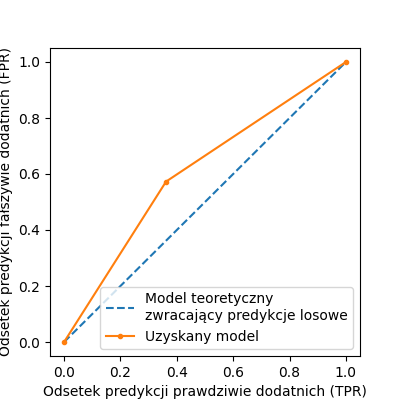

In [11]:
data = pd.read_csv("mushroom_cleaned.csv")
data.dropna(inplace=True)
X = data.to_numpy()[:,0:8]
y = data.to_numpy()[:,8]

X = ss().fit_transform(X)

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state=1)

model = LogisticRegression(penalty='l1', C=0.0003359653787894034, solver = 'liblinear', max_iter= 947)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_n = model.predict_proba(X_test)
print("predict:")
print("Classification Report:")
print(classification_report(y_test, y_pred))

temp = []
for i in y_pred_n:
    if i[0]>i[1]:
        temp.append(0)
    else:
        temp.append(1)
temp = np.array(temp)
print("\npredict_proba:")
print("Classification Report:")
print(classification_report(y_test, temp.round()))

print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_n[:, 1]))

print("\nLog Loss:")
print(log_loss(y_test, y_pred_n[:, 1]))

def plot_roc_curve(y, preds):
    fpr, tpr, thresholds = roc_curve(y, preds)

    plt.clf()
    plt.plot([0, 1], [0, 1], linestyle='--', label='Model teoretyczny\nzwracający predykcje losowe')
    plt.plot(fpr, tpr, marker='.', label='Uzyskany model')
    plt.xlabel('Odsetek predykcji prawdziwie dodatnich (TPR)')
    plt.ylabel('Odsetek predykcji fałszywie dodatnich (FPR)')
    plt.legend()

    plt.show()

plot_roc_curve(y_test, y_pred)

Najpierw korzystałem z roc score, jak w przykładzie, ale potem zmieniłem na accuracy, powód opisałem w poprzednim komentarzu

In [9]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer
import optuna
import numpy as np
from sklearn.linear_model import LogisticRegression

scoring = {'roc_macro': make_scorer(roc_auc_score)}
scoring = {'accuracy': make_scorer(accuracy_score)}

def objective(trial, model, get_space, X, y):
    model_space = get_space(trial)
    mdl = model(**model_space)
    scores = cross_validate(
        mdl, X, y, 
        scoring=scoring,
        cv=StratifiedKFold(n_splits=8),
        return_train_score=True
    )
    return np.mean(scores['test_accuracy'])

def get_space(trial):
    space = {
        "C": trial.suggest_uniform("C", 0, 0.001),
        "max_iter": trial.suggest_int("max_iter", 500, 1000),
        "solver": trial.suggest_categorical("solver", ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"])
    }
    return space

trials = 1000
model = LogisticRegression

study = optuna.create_study(direction='maximize')

study.optimize(
    lambda x: objective(x, model, get_space, X_train, y_train), 
    n_trials=trials
)

print('Best Parameters:', study.best_params)

lr = model(**study.best_params)
lr.fit(X_train, y_train)

preds = lr.predict(X_test)
print('Test Accuracy:', roc_auc_score(y_test, preds))

[I 2024-12-15 17:05:38,174] A new study created in memory with name: no-name-f22bc8e6-36b5-458f-a697-7a900b949926
/tmp/ipykernel_889453/2833871103.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "C": trial.suggest_uniform("C", 0, 0.001),
[I 2024-12-15 17:05:38,368] Trial 0 finished with value: 0.6197601895648893 and parameters: {'C': 0.000519184955749376, 'max_iter': 795, 'solver': 'sag'}. Best is trial 0 with value: 0.6197601895648893.
/tmp/ipykernel_889453/2833871103.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "C": trial.suggest_uniform("C", 0, 0.001),
[I 2024-12-15 17:05:38,537] Trial 1 finished with value: 0.6195982596230156 and parameters: {'C': 0.000512499615601649, 'max_iter': 757, 's

Best Parameters: {'C': 0.0003183510181340189, 'max_iter': 630, 'solver': 'liblinear'}
Test Accuracy: 0.6094426129718914


In [97]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state=86)

def objective(trial):
    l_r = trial.suggest_categorical('learning_rate', [0.1, 0.01, 0.001, 0.001, 0.0001])
    optimizer = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop', 'SGD', 'Adagrad'])
    loss = trial.suggest_categorical('loss', ['binary_crossentropy', 'categorical_crossentropy', 'sparse_categorical_crossentropy'])
    epochs = trial.suggest_int("epochs", 200, 400, 50)

    model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X.shape[1],))
    ]
)

    if optimizer=="Adam":
        model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=l_r), loss=loss, metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=[X_test, y_test])
    
    if optimizer=='RMSprop':
        model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=l_r), loss=loss, metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=[X_test, y_test])
    
    if optimizer=='SGD':
        model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=l_r), loss=loss, metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=[X_test, y_test])
    
    if optimizer=='Adagrad':
        model.compile(optimizer = tf.keras.optimizers.Adagrad(learning_rate=l_r), loss=loss, metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=[X_test, y_test])

    loss, accuracy = model.evaluate(X_test, y_test)

    return accuracy

study = op.create_study(direction='maximize')

study.optimize(objective, n_trials=20)
clear_output()

print(f'Najlepsze hiperparametry: {study.best_params}')
print(f'Najlepszy wynik dokładności: {study.best_value}')


Najlepsze hiperparametry: {'learning_rate': 0.001, 'optimizer': 'Adam', 'loss': 'categorical_crossentropy', 'epochs': 200}
Najlepszy wynik dokładności: 0.7402597665786743
